# Basic AutoML Example

In [1]:
%%capture

!pip install rdkit-pypi

In [2]:
%%capture
!pip install flaml

In [15]:
## Import packages
import pandas as pd
from rdkit import Chem
from flaml import AutoML
from rdkit.Chem import rdMolDescriptors as rd
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
## upload the smiles csv file
from google.colab import files

# Upload 'dilismiles.csv' file
uploaded = files.upload()

smilescsv = pd.read_csv('dilismiles.csv', names = ['col_smiles'])
smileslist = smilescsv['col_smiles'].tolist()

Saving dilismiles.csv to dilismiles (2).csv


In [5]:
## upload the dili_padel_2d csv file that has the activity column
## upload the smiles csv file
from google.colab import files

# Upload 'dilismiles.csv' file
uploaded = files.upload()
data = pd.read_csv('dili_padel_2d.csv')
dataframe = pd.DataFrame(data)
desc = pd.DataFrame(dataframe.iloc[:, 3:])

Saving dili_padel_2d.csv to dili_padel_2d (1).csv


<ipython-input-5-c8b91ff27e9f>:7: DtypeWarning: Columns (423,424,425,426,427,428,429,430,431,477,478,479,480,481,482,483,484,485,540,541,542,543,544,545,546,547,548,603,604,605,606,607,608,609,610,611,1012,1013,1050,1052,1074,1083,1084,1121,1123,1145,1217,1218,1219,1220,1222,1223,1224,1226,1227,1229) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dili_padel_2d.csv')


In [6]:
## Outcome is the activity column
y = dataframe['Outcome']
y = np.array(y)

In [7]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

modelAutoML = AutoML(task="classification",time_budget=60)
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)
for i, (train, test) in enumerate(cv.split(desc, y)):
  modelAutoML.fit(desc.iloc[train], y[train], time_budget=20, verbose=-1)
  y_hat = modelAutoML.predict(desc.iloc[test])
  fpr, tpr, _ = roc_curve(y[test], y_hat)
  print("AUROC", auc(fpr, tpr))


AUROC 0.6578947368421053
AUROC 0.48881578947368426
AUROC 0.5
AUROC 0.5401315789473684
AUROC 0.48717948717948717
AUROC 0.5121794871794871
AUROC 0.5987179487179488
AUROC 0.5115384615384615
AUROC 0.5
AUROC 0.5802968960863698


#Using Ersilia

In [8]:
## To clone ersilia embeddings lite repositoty
!git clone https://github.com/ersilia-os/compound-embedding-lite.git


Cloning into 'compound-embedding-lite'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 34 (delta 6), reused 9 (delta 2), pack-reused 17
Receiving objects: 100% (34/34), 42.98 MiB | 32.46 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [9]:
%cd compound-embedding-lite
!pip install .

/content/compound-embedding-lite
Processing /content/compound-embedding-lite
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.8 MB/s eta 0:00:00
  Created wheel for eosce: filename=eosce-0.1.0-py3-none-any.whl size=45065404 sha256=17fbba87fbbe60c0b393a00be53b968ba2df3db9f927797eec1ef823b8280163
  Stored in directory: /root/.cache/pip/wheels/52/a4/e9/63fab28d020f95b10136d46d5cf8c3ad69d132b6337fda2b91
Successfully built eosce
  Attempting uninstal

In [1]:
## using ersilia to change smiles to embeddings
import pandas as pd
from eosce.models import ErsiliaCompoundEmbeddings
## upload the smiles csv file
from google.colab import files

# Upload 'dilismiles.csv' file
uploaded = files.upload()


smilescsv = pd.read_csv('dilismiles.csv', names = ['col_smiles'])

# Load your CSV file
df = pd.read_csv('dilismiles.csv')

# Assuming 'SMILES' is the column containing chemical compounds
compounds = df['col_smiles'].tolist()

# Initialize the ErsiliaCompoundEmbeddings model
model = ErsiliaCompoundEmbeddings()

# Create a new column for embeddings
df['embeddings'] = df['col_smiles'].apply(lambda x: model.transform([x])[0])

# Display the DataFrame with the new embeddings
print(df.head())


Saving dilismiles.csv to dilismiles (1).csv
                                          col_smiles  \
0  [H][C@]1([S-])O[C@]([H])(CO)[C@@]([H])(O)[C@](...   
1  CN(CCCCCCCCCCN(C)C(=O)Oc1cccc(c1)[N+](C)(C)C)C...   
2   [H][C@]12Cc3ccc(OC)cc3[C@@]3(CCCC[C@]13[H])CCN2C   
3  [H][C@@]12CCCN1C(=O)[C@]([H])(Cc1ccccc1)N1C(=O...   
4  [H][C@]1(C)C[C@@]2([H])[C@]3([H])CCC4=CC(=O)C=...   

                                          embeddings  
0  [-0.098519824, 0.12393576, 0.13180989, 0.05279...  
1  [0.015572911, 0.025008846, 0.015938658, 0.0437...  
2  [0.0857603, 0.07983373, -0.014359435, -0.21451...  
3  [0.13486916, 0.07353798, -0.14174657, -0.23422...  
4  [0.100365646, 0.038999967, -0.020612031, -0.03...  


In [7]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
import numpy as np


# Extract embeddings into a NumPy array
X = np.vstack(dataframe['ID'].values)
X.shape

(588, 1)

In [8]:
y.shape

(588,)

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune
INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune
INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune
INFO:flaml.tune.searcher.blendsearch:No low-cost partial conf

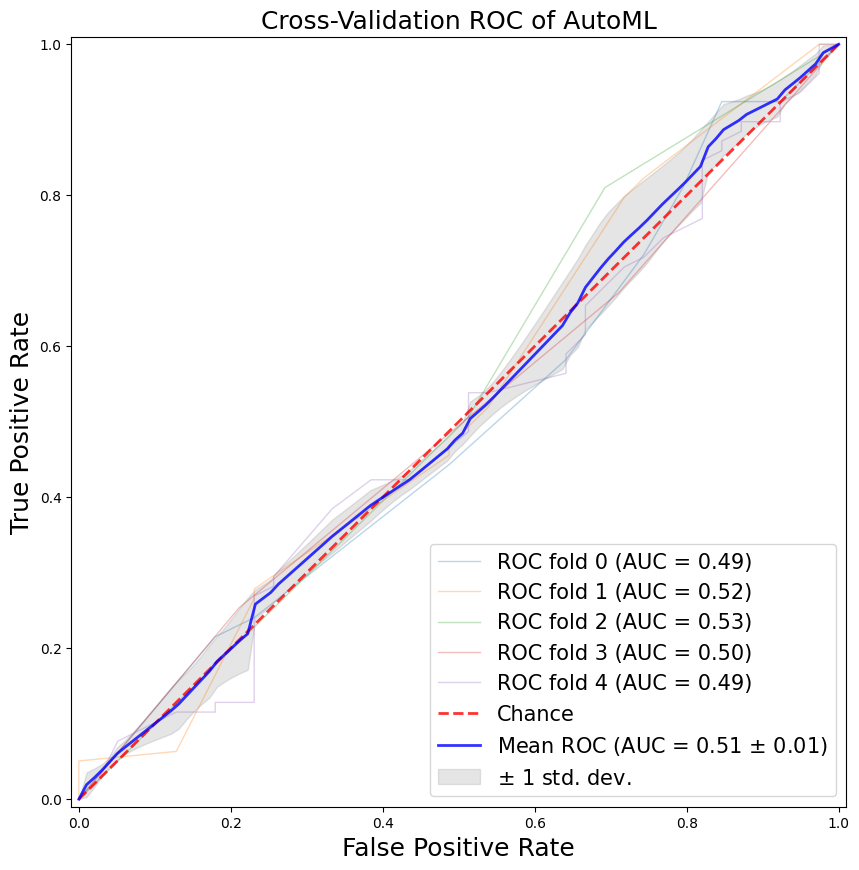

In [18]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Initialize AutoML for classification task
modelAutoML = AutoML(task="classification", time_budget=60, logistic_max_iter=20000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 10))
i = 0

for train, test in cv.split(X, y):
    modelAutoML.fit(X[train], y[train], verbose=-1)
    probas_ = modelAutoML.predict_proba(X[test])[:, 1]

    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of AutoML', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

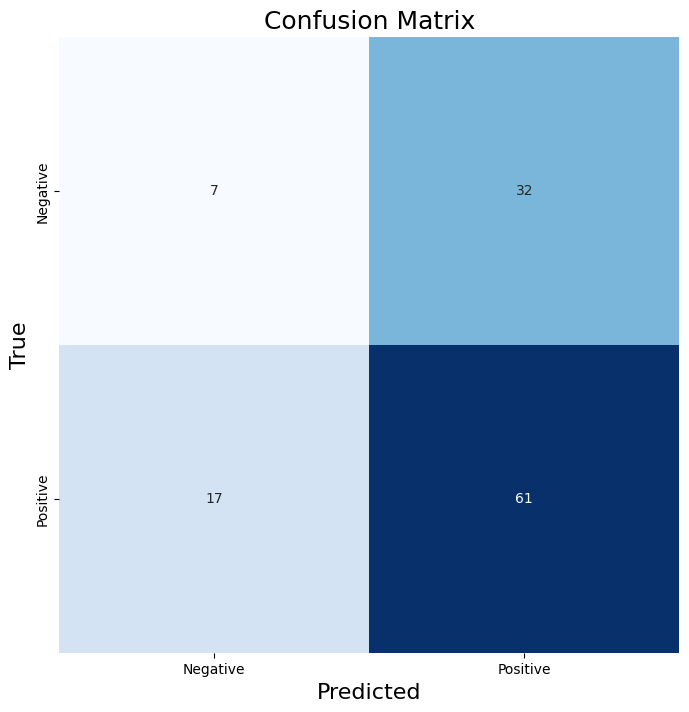

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.18      0.22        39
           1       0.66      0.78      0.71        78

    accuracy                           0.58       117
   macro avg       0.47      0.48      0.47       117
weighted avg       0.53      0.58      0.55       117



In [22]:
## confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Assuming modelAutoML is your trained AutoML model
predictions = modelAutoML.predict(X[test])

# Get the confusion matrix
cm = confusion_matrix(y[test], predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted", fontsize=16)
plt.ylabel("True", fontsize=16)
plt.title("Confusion Matrix", fontsize=18)

plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y[test], predictions))

# With Morgan Fingerprints

In [19]:
##import dependecies
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

In [20]:
###UPLOAD THE smiles csv fle
import pandas as pd
smilescsv = pd.read_csv('dilismiles.csv', names=['col_smiles'])

In [23]:
# Add RDKit molecules column and filter out invalid molecules
smilescsv['mol'] = smilescsv['col_smiles'].apply(lambda x: Chem.MolFromSmiles(x) if x is not None else None)
smilescsv = smilescsv.dropna(subset=['mol'])

# Generate Morgan Fingerprints
smilescsv['morgan_fps'] = smilescsv['mol'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=1024))

# Convert the Morgan Fingerprints to a numpy array
X = np.array([list(fp.GetOnBits()) for fp in smilescsv['morgan_fps']])

<ipython-input-23-32d9752f96ca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smilescsv['morgan_fps'] = smilescsv['mol'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=1024))
<ipython-input-23-32d9752f96ca>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([list(fp.GetOnBits()) for fp in smilescsv['morgan_fps']])


In [24]:
X.shape

(588,)

In [25]:
y.shape

(588,)

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune
INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune
INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


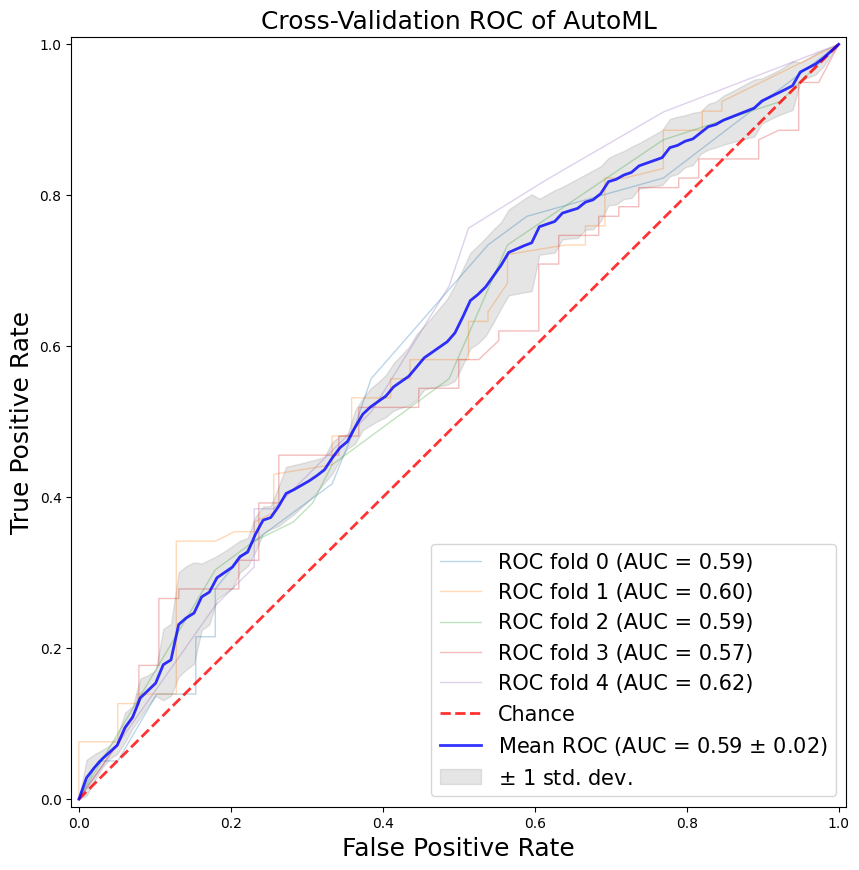

In [30]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Assuming you have X as a list of lists
X_padded = pad_sequences(X, dtype='float32', padding='post')

# Initialize AutoML for classification task
modelAutoML = AutoML(task="classification", time_budget=60, logistic_max_iter=20000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 10))
i = 0

for train, test in cv.split(X_padded, y):
    modelAutoML.fit(X_padded[train], y[train], verbose=-1)
    probas_ = modelAutoML.predict_proba(X_padded[test])[:, 1]

    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of AutoML', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()


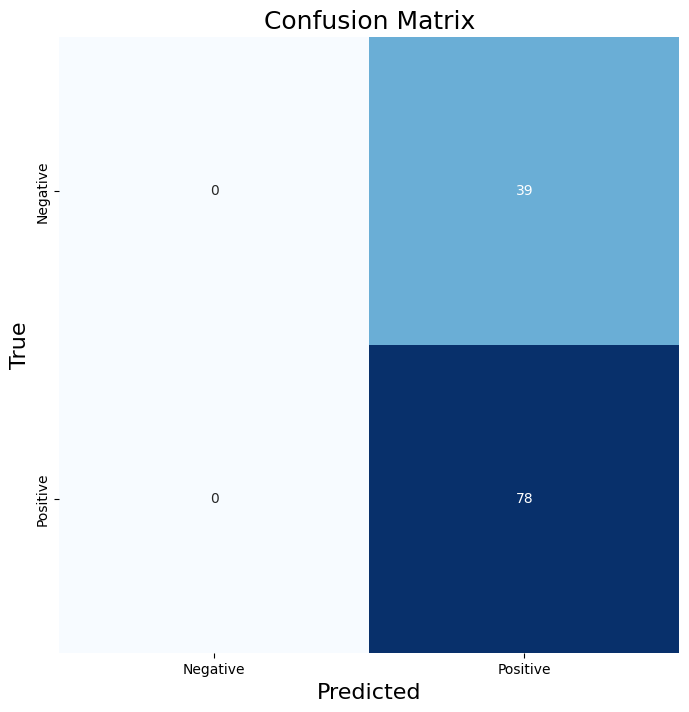

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.67      1.00      0.80        78

    accuracy                           0.67       117
   macro avg       0.33      0.50      0.40       117
weighted avg       0.44      0.67      0.53       117



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
## confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Assuming modelAutoML is your trained AutoML model
predictions = modelAutoML.predict(X_padded[test])

# Get the confusion matrix
cm = confusion_matrix(y[test], predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted", fontsize=16)
plt.ylabel("True", fontsize=16)
plt.title("Confusion Matrix", fontsize=18)

plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y[test], predictions))